# Tugas 5
### **Clustering pada dataset iris menggunakan K-Means**
**K-Means Clustering** adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

Clustering Algoritma (K-Means) memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

In [66]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [62]:
#source data
dataset_url = "https://raw.githubusercontent.com/indyrajanuar/datamining/main/IRIS.csv"
#create dataframe
df = pd.read_csv(dataset_url)
x = df.iloc[:, [0, 1, 2, 3]].values

In [73]:
#basic information regarding data
df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [64]:
#Frequency distribution of species"
df_outcome = pd.crosstab(index=df["species"],  # Make a crosstab
                              columns="count")      # Name the count column

df_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [65]:
df_setosa=df.loc[df["species"]=="Iris-setosa"]
df_virginica=df.loc[df["species"]=="Iris-virginica"]
df_versicolor=df.loc[df["species"]=="Iris-versicolor"]

### **Distribution plots**

Plot each flower to a histogram

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

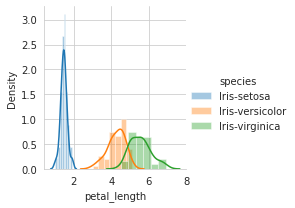

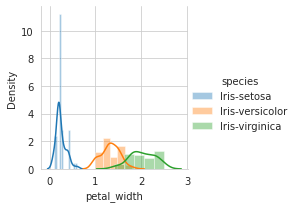

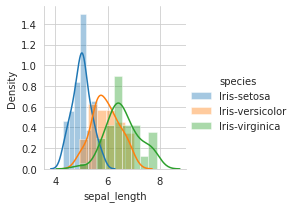

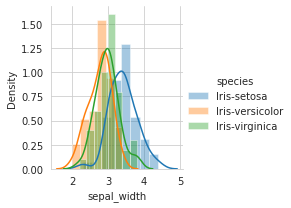

In [67]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

Scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


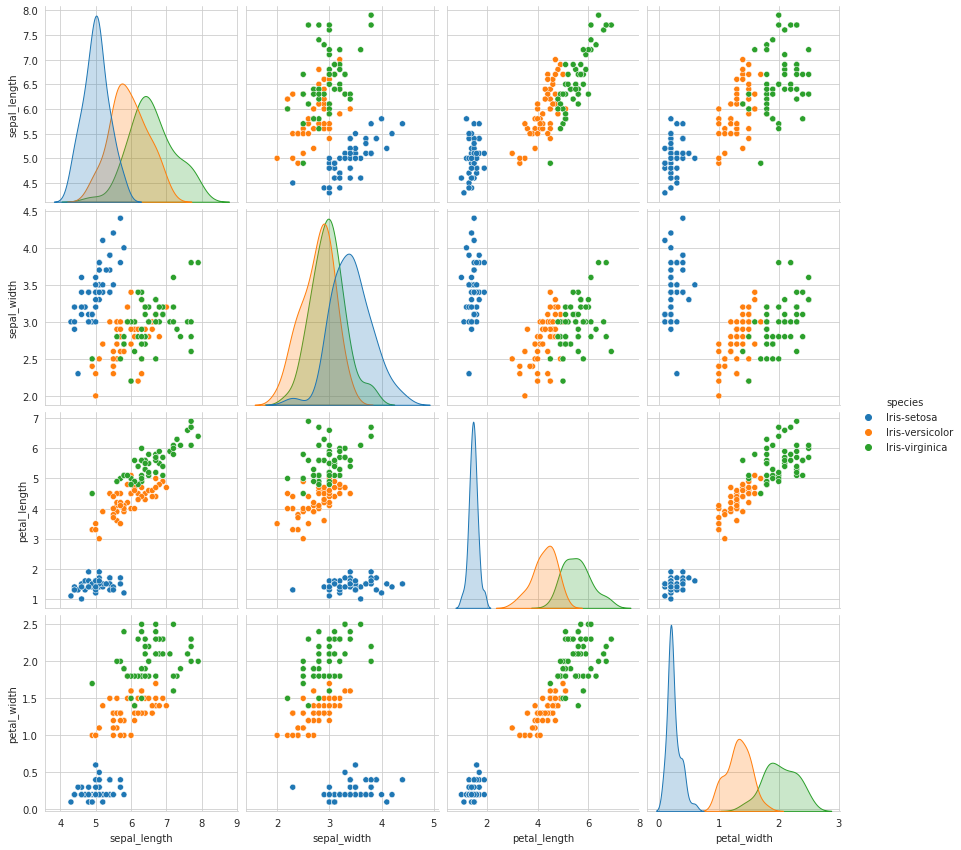

In [68]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

**K-means** adalah algoritma berbasis centroid, atau algoritma berbasis jarak, di mana kami menghitung jarak untuk menetapkan titik ke sebuah cluster. Dalam K-Means, setiap cluster dikaitkan dengan centroid.

### **Algoritma K-Means**
1. Tentukan jumlah cluster (K), tetapkan pusat cluster sembarang.
2. Hitung jarak setiap data ke pusat cluster.
3. Kelompokkan data ke dalam cluster yang dengan jarak yang paling pendek.
4. Hitung pusat cluster.
5. Ulangi langkah 2 - 4 hingga sudah tidak ada lagi data yang berpindah ke
cluster yang lain.


In [69]:
#menentukan jumlah cluster yang optimal
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Menggunakan metode elbow untuk menentukan jumlah cluster yang optimal**

Metode Elbow adalah suatu teknik yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.

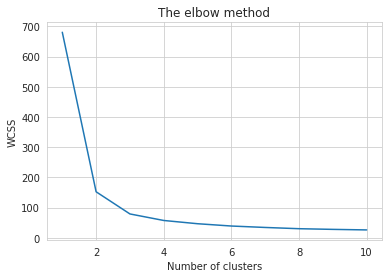

In [70]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Berdasarkan grafik di atas, dengan menggunakan Metode Elbow dapat diketahui bahwa dari titik pertama yang curam setelah itu pergerakannya mulai landai. Pada titik ke 3-4 pergerakkannya landai untuk yang pertama sehingga berdasarkan metode ini, nilai optimum yang disarankan adalah 3.

### **Penerapan K-Means Clustering**

In [71]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

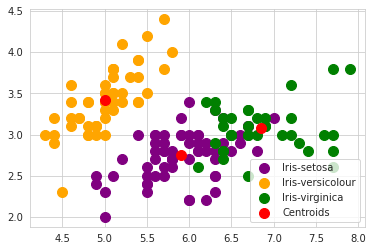

In [72]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()